<a href="https://colab.research.google.com/github/abdullahalmusabbir/Algorithm/blob/main/Chest_X_Ray_Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Importin Libraries**

In [2]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

# **2. Setting Up kaggle Import**

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("deeppythonist/balanced-chest-x-ray-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.53G/1.53G [01:09<00:00, 23.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/deeppythonist/balanced-chest-x-ray-dataset/versions/1


# **3. Importing Data**

In [4]:
dataset_path = path  # Use the path from the previous cell

# Define image size and batch size
img_height = 128
img_width = 128
batch_size = 32

# Load the training dataset
train_ds = image_dataset_from_directory(
    path + '/train',
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True
)

# Load the test dataset
test_ds = image_dataset_from_directory(
    path + '/test',
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False # No need to shuffle test data
)

# Get the class names (from the training dataset)
class_names = train_ds.class_names
print("Class names:", class_names)

print("\nNote: A validation dataset was not found in the expected directory structure.")

Found 49540 files belonging to 2 classes.
Found 12386 files belonging to 2 classes.
Class names: ['Finding', 'NoFinding']

Note: A validation dataset was not found in the expected directory structure.


# **4. Visualizing Data**

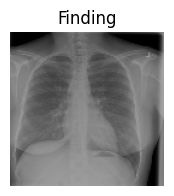

In [5]:
images, labels = next(iter(train_ds))
class_names = {k: v for k, v in enumerate(train_ds.class_names)} # Corrected dictionary creation

plt.figure(figsize=(2, 2))
plt.imshow(images[1].numpy().astype("uint8"))
label_index = labels[1].numpy()
label_name = class_names[int(label_index)] # Cast to int to match dictionary keys
plt.title(f"{label_name}")
plt.axis('off')

plt.show()

In [6]:
np.max(images)

np.uint8(255)

# **5. CNN MODEL BUILDING**

**5.1 Importing Pre Trained Model 'Efficient Net B0'**

In [7]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False

# Classification layer for binary classification
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)
# we can change the last layer according to our case scenerio...and can also add more dense layers

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [8]:
model = Model(inputs=base_model.input, outputs=x)

In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

**5.2 Training Of Pretrained Model**

In [10]:
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds # Corrected variable name
)

Epoch 1/10
1549/1549 ━━━━━━━━━━━━━━━━━━━━ 151s 79ms/step - accuracy: 0.5970 - loss: 0.6716 - val_accuracy: 0.6282 - val_loss: 0.6507
Epoch 2/10
1549/1549 ━━━━━━━━━━━━━━━━━━━━ 92s 59ms/step - accuracy: 0.6241 - loss: 0.6528 - val_accuracy: 0.6287 - val_loss: 0.6478
Epoch 3/10
1549/1549 ━━━━━━━━━━━━━━━━━━━━ 92s 59ms/step - accuracy: 0.6257 - loss: 0.6492 - val_accuracy: 0.6311 - val_loss: 0.6496
Epoch 4/10
1549/1549 ━━━━━━━━━━━━━━━━━━━━ 139s 57ms/step - accuracy: 0.6284 - loss: 0.6457 - val_accuracy: 0.6298 - val_loss: 0.6482
Epoch 5/10
1549/1549 ━━━━━━━━━━━━━━━━━━━━ 140s 56ms/step - accuracy: 0.6333 - loss: 0.6426 - val_accuracy: 0.6310 - val_loss: 0.6475
Epoch 6/10
1549/1549 ━━━━━━━━━━━━━━━━━━━━ 144s 58ms/step - accuracy: 0.6363 - loss: 0.6392 - val_accuracy: 0.6297 - val_loss: 0.6512
Epoch 7/10
1549/1549 ━━━━━━━━━━━━━━━━━━━━ 143s 58ms/step - accuracy: 0.6413 - loss: 0.6339 - val_accuracy: 0.6280 - val_loss: 0.6541
Epoch 8/10
1549/1549 ━━━━━━━━━━━━━━━━━━━━ 87s 56ms/step - accuracy: 0.6

# **6. Fine-Tunning Model**

6.1 Training Few Layers Of Pre Trained Model

In [11]:
base_model.trainable = True
for layer in base_model.layers[:150]:
    layer.trainable = False

In [12]:
len(base_model.layers)

238

In [14]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(test_ds)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

388/388 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.5997 - loss: 1.0187
Test Loss: 1.0125339031219482
Test Accuracy: 0.599790096282959


In [15]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 128, 128,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 128, 128,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 128, 128,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 129, 129,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 64, 64,    │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 64, 64,    │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 64, 64,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 64, 64,    │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 64, 64,    │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 64, 64,    │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 64, 64,    │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 64, 64,    │        512 │ block1a_se_excit

 Total params: 4,213,668 (16.07 MB)

 Trainable params: 3,451,801 (13.17 MB)

 Non-trainable params: 761,867 (2.91 MB)

**6.2 Visualize Our Fine Tuned Model**

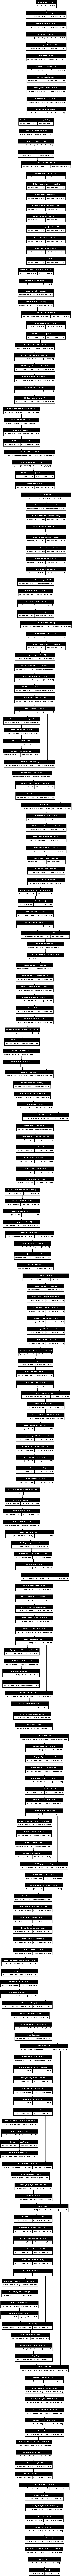

In [16]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# **6.3 Training Of Fine Tunned Model**

In [17]:
history_fine = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds
)

Epoch 1/10
1549/1549 ━━━━━━━━━━━━━━━━━━━━ 183s 91ms/step - accuracy: 0.5715 - loss: 1.0304 - val_accuracy: 0.6344 - val_loss: 0.6481
Epoch 2/10
1549/1549 ━━━━━━━━━━━━━━━━━━━━ 94s 61ms/step - accuracy: 0.6367 - loss: 0.6397 - val_accuracy: 0.6407 - val_loss: 0.6426
Epoch 3/10
1549/1549 ━━━━━━━━━━━━━━━━━━━━ 143s 62ms/step - accuracy: 0.6574 - loss: 0.6185 - val_accuracy: 0.6368 - val_loss: 0.6478
Epoch 4/10
1549/1549 ━━━━━━━━━━━━━━━━━━━━ 99s 64ms/step - accuracy: 0.6802 - loss: 0.5927 - val_accuracy: 0.6306 - val_loss: 0.6620
Epoch 5/10
1549/1549 ━━━━━━━━━━━━━━━━━━━━ 136s 60ms/step - accuracy: 0.7088 - loss: 0.5558 - val_accuracy: 0.6213 - val_loss: 0.6899
Epoch 6/10
1549/1549 ━━━━━━━━━━━━━━━━━━━━ 143s 61ms/step - accuracy: 0.7463 - loss: 0.5035 - val_accuracy: 0.6170 - val_loss: 0.7333
Epoch 7/10
1549/1549 ━━━━━━━━━━━━━━━━━━━━ 139s 59ms/step - accuracy: 0.7855 - loss: 0.4428 - val_accuracy: 0.6113 - val_loss: 0.7978
Epoch 8/10
1549/1549 ━━━━━━━━━━━━━━━━━━━━ 148s 63ms/step - accuracy: 0.

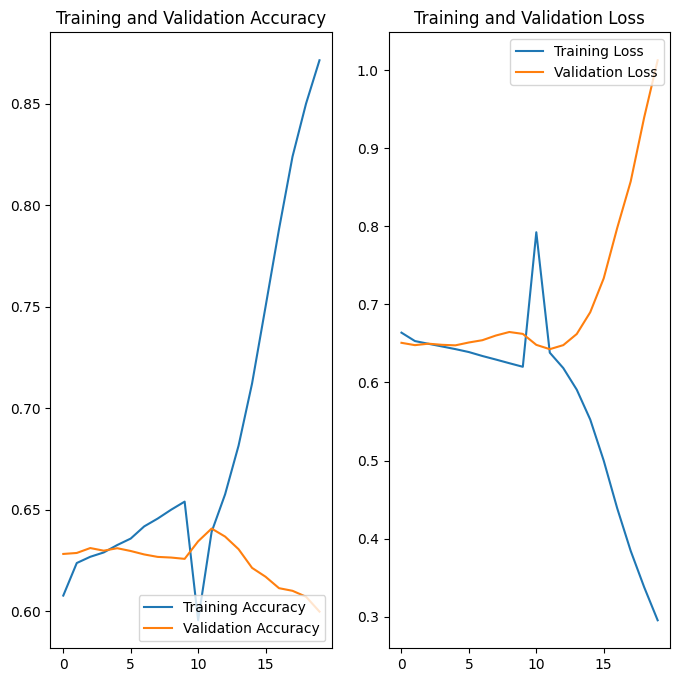

In [22]:
# Combine the training histories if both exist
if 'history' in locals() and 'history_fine' in locals():
    # Assuming the metrics are the same in both histories
    acc = history.history['accuracy'] + history_fine.history['accuracy']
    loss = history.history['loss'] + history_fine.history['loss']
    val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']
    val_loss = history.history['val_loss'] + history_fine.history['val_loss']
    epochs_range = range(len(acc))
elif 'history_fine' in locals():
    acc = history_fine.history['accuracy']
    loss = history_fine.history['loss']
    val_acc = history_fine.history['val_accuracy']
    val_loss = history_fine.history['val_loss']
    epochs_range = range(len(acc))
elif 'history' in locals():
    acc = history.history['accuracy']
    loss = history.history['loss']
    # Check if validation data was used in the initial training
    if 'val_accuracy' in history.history:
        val_acc = history.history['val_accuracy']
        val_loss = history.history['val_loss']
        epochs_range = range(len(acc))
    else:
        # If no validation data was used, just plot training metrics
        plt.figure(figsize=(8, 8))
        plt.subplot(1, 2, 1)
        plt.plot(range(len(acc)), acc, label='Training Accuracy')
        plt.legend(loc='lower right')
        plt.title('Training Accuracy')

        plt.subplot(1, 2, 2)
        plt.plot(range(len(loss)), loss, label='Training Loss')
        plt.legend(loc='upper right')
        plt.title('Training Loss')
        plt.show()
        # Stop here if only training history is available
        raise StopIteration("Only training history available. Cannot plot validation metrics.")


plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
True class: Finding
Predicted class: NoFinding


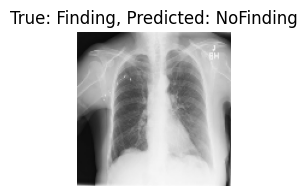

In [23]:
# Get a batch of images and labels from the test set
test_images, test_labels = next(iter(test_ds))

# Select a single image and its label from the batch
sample_image = test_images[0]
sample_label = test_labels[0]

# Add a batch dimension to the image
sample_image = tf.expand_dims(sample_image, 0)

# Make a prediction
predictions = model.predict(sample_image)

# Get the predicted class (0 or 1)
predicted_class_index = tf.round(predictions[0][0]).numpy().astype(int)

# Get the class names from the training dataset
class_names = train_ds.class_names

# Get the predicted class name
predicted_class_name = class_names[predicted_class_index]

# Get the true class name
true_class_name = class_names[sample_label.numpy()]

print(f"True class: {true_class_name}")
print(f"Predicted class: {predicted_class_name}")

# Display the image
plt.figure(figsize=(2, 2))
plt.imshow(test_images[0].numpy().astype("uint8"))
plt.title(f"True: {true_class_name}, Predicted: {predicted_class_name}")
plt.axis('off')
plt.show()

In [21]:
# Save the trained model
model_save_path = "chest_xray_model.keras"
model.save(model_save_path)

print(f"Model saved to {model_save_path}")

Model saved to chest_xray_model.keras
